# Mount the drive

In [1]:
#Connecting this collab notebook to my account.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load a saved model
Please change the path value below

In [2]:
import tensorflow as tf
#path of the saved model
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/AIClub_AP_Gorrumuchu_Vamsi/project/best model/one_piece_spectrogram_model_30_0.001.h5')

# Test Images Path

In [3]:
# Provide the test path to the folder
src_folder = "/content/drive/MyDrive/AIClub_AP_Gorrumuchu_Vamsi/project/Datasets/test"

# Dictionary of the labels predicted by the model


In [4]:
import os

#predicted labels
dict_labels = [file for file in os.listdir(src_folder) if os.path.isdir(os.path.join(src_folder, file))]
dict_labels.sort()
dict_labels = dict(enumerate(dict_labels))
print(dict_labels)

{0: 'Ace', 1: 'Akainu', 2: 'Brook', 3: 'Chopper'}


# Create a list of the images in the test and train folders

In [5]:
import os
directory_contents = []
# Find all subfolders in the source folder src_folder
for index in range(0,len(dict_labels)):
  directory_contents.append(dict_labels[index])
print(directory_contents)

# List the files in each subfolder
list_files = []
# Find all the files
for folder_name in directory_contents:
  files_list = os.listdir(os.path.join(src_folder, folder_name))
  list_files.append(files_list)
print(list_files)

['Ace', 'Akainu', 'Brook', 'Chopper']
[['33.png_inverted.png', '34.png_inverted.png', '24.jpg', '28.png_inverted.png', '30.png', '3.jpg', '32.png_inverted.png', '5.jpg', '47.jpg_inverted.png'], ['10.png_inverted.png', '20.png', '16.png_inverted.png', '17.png', '40.png_inverted.png', '41.png', '27.png', '30.png_inverted.png', '32.png'], ['16.png', '38.png', '29.png', '32.png', '26.png', '18_inverted.png', '28_inverted.png', '31.png', '39_inverted.png'], ['1.png_inverted.png', '10.png', '19.png_inverted.png', '27.png', '29.png', '3.png_inverted.png', '24.png_inverted.png', '47.png_inverted.png', '31.png']]


# Create the predictions and label lists

In [6]:
from keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np
# A counter to increment after processing each categoty
category_count = 0
# label list
label = []
# Prediction list
predictions = []
y_score = []
for categories in list_files:
  # Create the labels while iterating over each category
  label_temp = np.ones((len(categories))).astype(int)*category_count
  print(label_temp)
  # Add it to existing labels
  label.extend(label_temp)
  for file_name in categories:
    # test image file
    img_path = src_folder + '/' + directory_contents[category_count] + '/' + file_name
    img = image.load_img(img_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    img_preprocessed = preprocess_input(img_batch)
    prediction = loaded_model.predict(img_preprocessed)
    y_score.append(prediction)
    # Save the index of maximum probability
    predictions.append(np.argmax(prediction))
  category_count += 1


[0 0 0 0 0 0 0 0 0]
1/1 [==============================] - 0s 33ms/step
[1 1 1 1 1 1 1 1 1]
1/1 [==============================] - 0s 21ms/step
[2 2 2 2 2 2 2 2 2]
1/1 [==============================] - 0s 22ms/step
[3 3 3 3 3 3 3 3 3]
1/1 [==============================] - 0s 24ms/step


# Consfusion Matrix

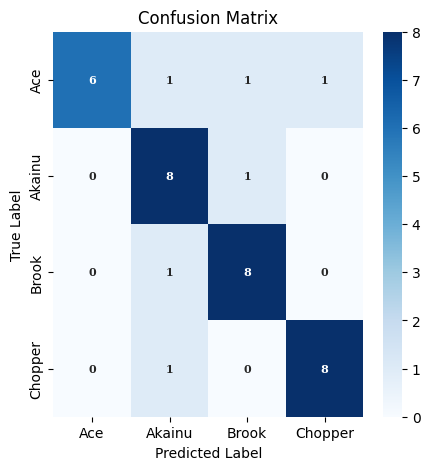

In [7]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
display_labels = sorted(directory_contents)
plt.figure(figsize = (5,5))
sns.heatmap(confusion_matrix(label,predictions),
            annot = True,
            fmt = 'g',
            cmap = "Blues",
            xticklabels=display_labels,
            yticklabels = display_labels,
            annot_kws={
                'fontsize': 8,
                'fontweight': 'bold',
                'fontfamily': 'serif'
            })
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
#ConfusionMatrixDisplay.from_predictions(label, predictions, display_labels=display_labels, cmap="binary")
plt.show()

# Classification Report

In [8]:
#classification reports
from sklearn.metrics import classification_report
print(classification_report(label,predictions))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.73      0.89      0.80         9
           2       0.80      0.89      0.84         9
           3       0.89      0.89      0.89         9

    accuracy                           0.83        36
   macro avg       0.85      0.83      0.83        36
weighted avg       0.85      0.83      0.83        36

